In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%cd /content/drive/MyDrive/Image_Style_Transfer/SRGAN

/content/drive/MyDrive/Image_Style_Transfer/SRGAN


In [ ]:
!pip install opendatasets
!pip install -r requirements.txt

In [4]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/aftaab/mscoco")

Skipping, found downloaded files in "./mscoco" (use force=True to force download)


In [ ]:
!python train.py --epochs=100 --content-folder='/content/drive/MyDrive/Image_Style_Transfer/SRGAN/mscoco/mscoco/mscoco_resized/train2014'\
--style-image='/content/drive/MyDrive/Image_Style_Transfer/SRGAN/S_image6.jpg'\
--checkpoint-dir='checkpoint' --checkpoint-prefix='ckpt'

In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import losses
import data_loader
import config
from style_content_extractor import StyleContentModel
from model import StyleTransferModel
import argparse
from tqdm import tqdm
import os

# Initialize model
model = StyleTransferModel()

# Initialize optimizer
optim = Adam(learning_rate=config.LEARNING_RATE)

# Create checkpoint
checkpoint = tf.train.Checkpoint(model=model, optim=optim)

checkpoint.restore(os.path.join("checkpoint", "ckpt-2"))

tf.Tensor([422 512], shape=(2,), dtype=int32)


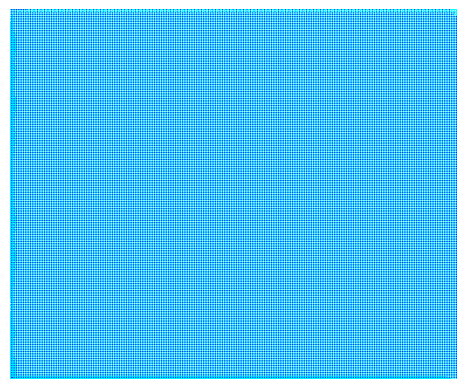

In [9]:
import helpers
import matplotlib.pyplot as plt

def tensor_to_image(input_tensor):
    # Expect input to be in range [-1, 1]
    input_tensor = (input_tensor * 127.5) + 127.5

    input_tensor = tf.cast(input_tensor, tf.uint8)

    if len(input_tensor.shape) > 3:
        input_tensor = input_tensor[0]

    return input_tensor.numpy()


img = helpers.load_image("/content/drive/MyDrive/Image_Style_Transfer/SRGAN/content_image_3.jpeg")

img = (img - 127.5) / 127.5


plt.imshow(tensor_to_image(model(img)))
plt.axis("off")

plt.show()